In [55]:
import numpy as np
import numba as nb
import scipy.stats as sp_s
from glob import glob

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def read_xyz(file_name):
    atoms = np.empty(0)
    xyz_coords = np.array([]).reshape((0, 3))
    with open(file_name, "r") as f:
        lines = f.readlines()

    for line in lines[2:]:
        line = line.strip().split()
        atoms = np.append(atoms, line[0])
        xyz_coords = np.vstack((xyz_coords, np.array([line[1], line[2], line[3]], dtype=float)))
    
    return atoms, xyz_coords

def read_lammps_out(file_name):
    atoms = np.empty(0)
    xyz_coords = np.array([]).reshape((0, 3))
    z_dims = []

    with open(file_name, "r") as f:
        lines = f.readlines()

    std_dict = {"1": "Si", "2": "O"}
    reading_file = False
    for line in lines:
        if "zlo zhi" in line:
            line = line.strip().split()
            z_dims.append(float(line[0]))
            z_dims.append(float(line[1]))
        
        if "Velocities" in line:
            reading_file = False
            
        if reading_file:
            line = line.strip().split()
            if len(line) != 0:
                atoms = np.append(atoms, std_dict[line[1]])
                xyz_coords = np.vstack((xyz_coords, np.array([line[3], line[4], line[5]], dtype=float)))

        if "Atoms # charge" in line:
            reading_file = True
        
    return atoms, xyz_coords, z_dims


@nb.njit
def _compiled_mic(xyz_atom1, xyz_atoms2, cl, num_coords: int):
    output_array = np.empty((num_coords, 3))
    for i in range(num_coords):
        dr = xyz_atoms2[i] - xyz_atom1
        for j in range(3):
            if dr[j] > 0.5*cl[j]:
                dr[j] -= cl[j]
            elif dr[j] < -0.5 * cl[j]:
                dr[j] += cl[j]
            else:
                pass
        output_array[i] = dr

    return output_array

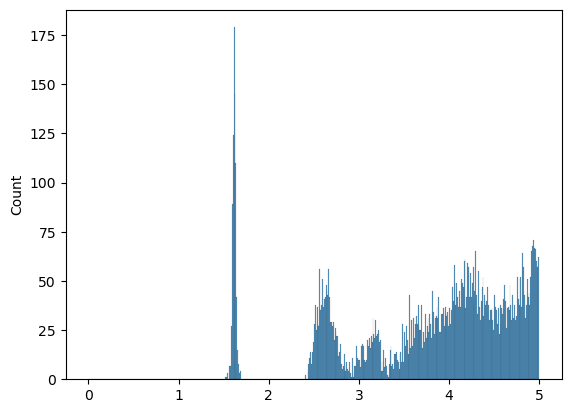

In [39]:
atoms, xyz_coords = read_xyz("distorted_crystal.xyz")
cell_dims = [21.5, 21.5, 15.487898113428573 - (-1.155898113430199)]

all_O_coords = xyz_coords[atoms == "O"]
all_Si_coords = xyz_coords[atoms == "Si"]

all_dists = np.empty(0)
for coord in xyz_coords:
    min_coords = _compiled_mic(coord, xyz_coords, cell_dims, len(all_O_coords))
    dists = np.linalg.norm(min_coords, axis=1)
    dists_within_tol = dists[(dists <= 5) & (dists != 0)]
    all_dists = np.append(all_dists, dists_within_tol)

sns.histplot(x=all_dists, binrange=[0,5], binwidth=0.01)
plt.show()


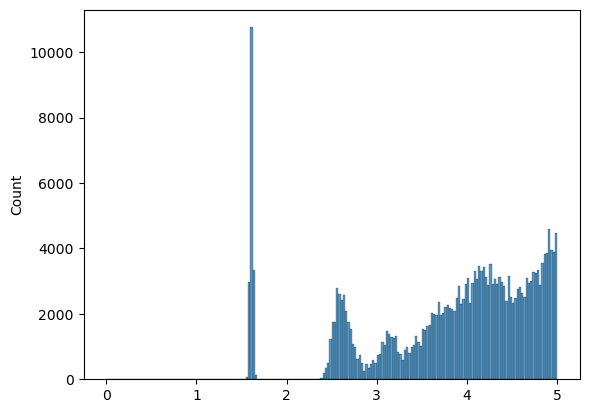

In [59]:
SiO_files = glob("amorphousSiO*.data")

all_dists = np.empty(0)

for files in SiO_files:
    atoms, xyz_coords, z_dim = read_lammps_out("amorphousSiO_1.data")
    cell_dims = [21.5, 21.5, z_dim[1]-z_dim[0]]
    
    for coord in xyz_coords:
        min_coords = _compiled_mic(coord, xyz_coords, cell_dims, len(atoms))
        dists = np.linalg.norm(min_coords, axis=1)
        dists_within_tol = dists[(dists <= 7) & (dists != 0)]
        all_dists = np.append(all_dists, dists_within_tol)

sns.histplot(x=all_dists, binrange=[0,5], binwidth=0.025)
plt.show()

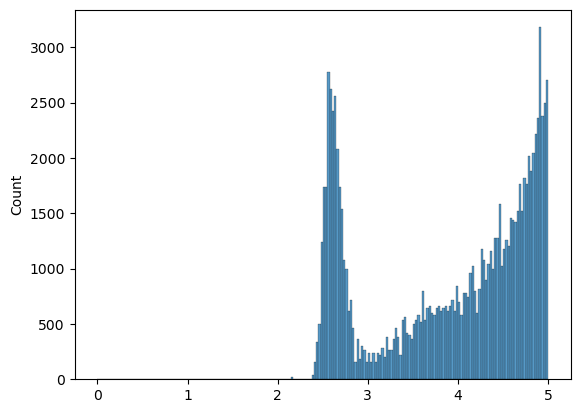

In [61]:
SiO_files = glob("amorphousSiO*.data")

all_dists = np.empty(0)

for files in SiO_files:
    atoms, xyz_coords, z_dim = read_lammps_out("amorphousSiO_1.data")
    cell_dims = [21.5, 21.5, z_dim[1]-z_dim[0]]
    
    all_O_coords = xyz_coords[atoms == "O"]

    for O in all_O_coords:
        min_coords = _compiled_mic(O, all_O_coords, cell_dims, len(all_O_coords))
        dists = np.linalg.norm(min_coords, axis=1)
        dists_within_tol = dists[(dists <= 7) & (dists != 0)]
        all_dists = np.append(all_dists, dists_within_tol)

sns.histplot(x=all_dists, binrange=[0,5], binwidth=0.025)
plt.show()

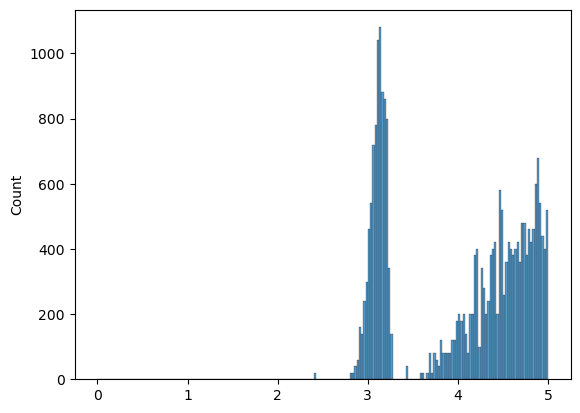

In [64]:
SiO_files = glob("amorphousSiO*.data")

all_dists = np.empty(0)

for files in SiO_files:
    atoms, xyz_coords, z_dim = read_lammps_out("amorphousSiO_1.data")
    cell_dims = [21.5, 21.5, z_dim[1]-z_dim[0]]
    
    all_Si_coords = xyz_coords[atoms == "Si"]

    for Si in all_Si_coords:
        min_coords = _compiled_mic(Si, all_Si_coords, cell_dims, len(all_Si_coords))
        dists = np.linalg.norm(min_coords, axis=1)
        dists_within_tol = dists[(dists <= 7) & (dists != 0)]
        all_dists = np.append(all_dists, dists_within_tol)

sns.histplot(x=all_dists, binrange=[0,5], binwidth=0.025)
plt.show()

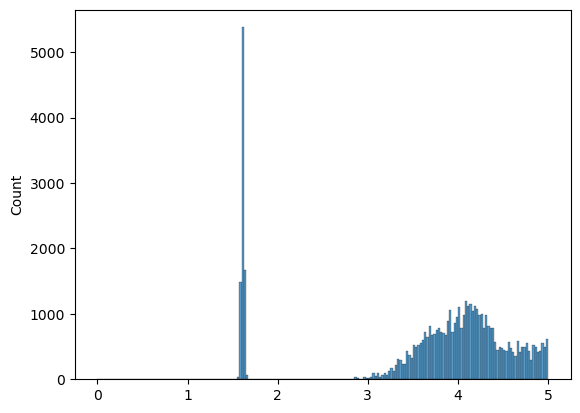

In [65]:
SiO_files = glob("amorphousSiO*.data")

all_dists = np.empty(0)

for files in SiO_files:
    atoms, xyz_coords, z_dim = read_lammps_out("amorphousSiO_1.data")
    cell_dims = [21.5, 21.5, z_dim[1]-z_dim[0]]
    
    all_O_coords = xyz_coords[atoms == "O"]
    all_Si_coords = xyz_coords[atoms == "Si"]

    for Si in all_Si_coords:
        min_coords = _compiled_mic(Si, all_O_coords, cell_dims, len(all_O_coords))
        dists = np.linalg.norm(min_coords, axis=1)
        dists_within_tol = dists[(dists <= 7) & (dists != 0)]
        all_dists = np.append(all_dists, dists_within_tol)

sns.histplot(x=all_dists, binrange=[0,5], binwidth=0.025)
plt.show()

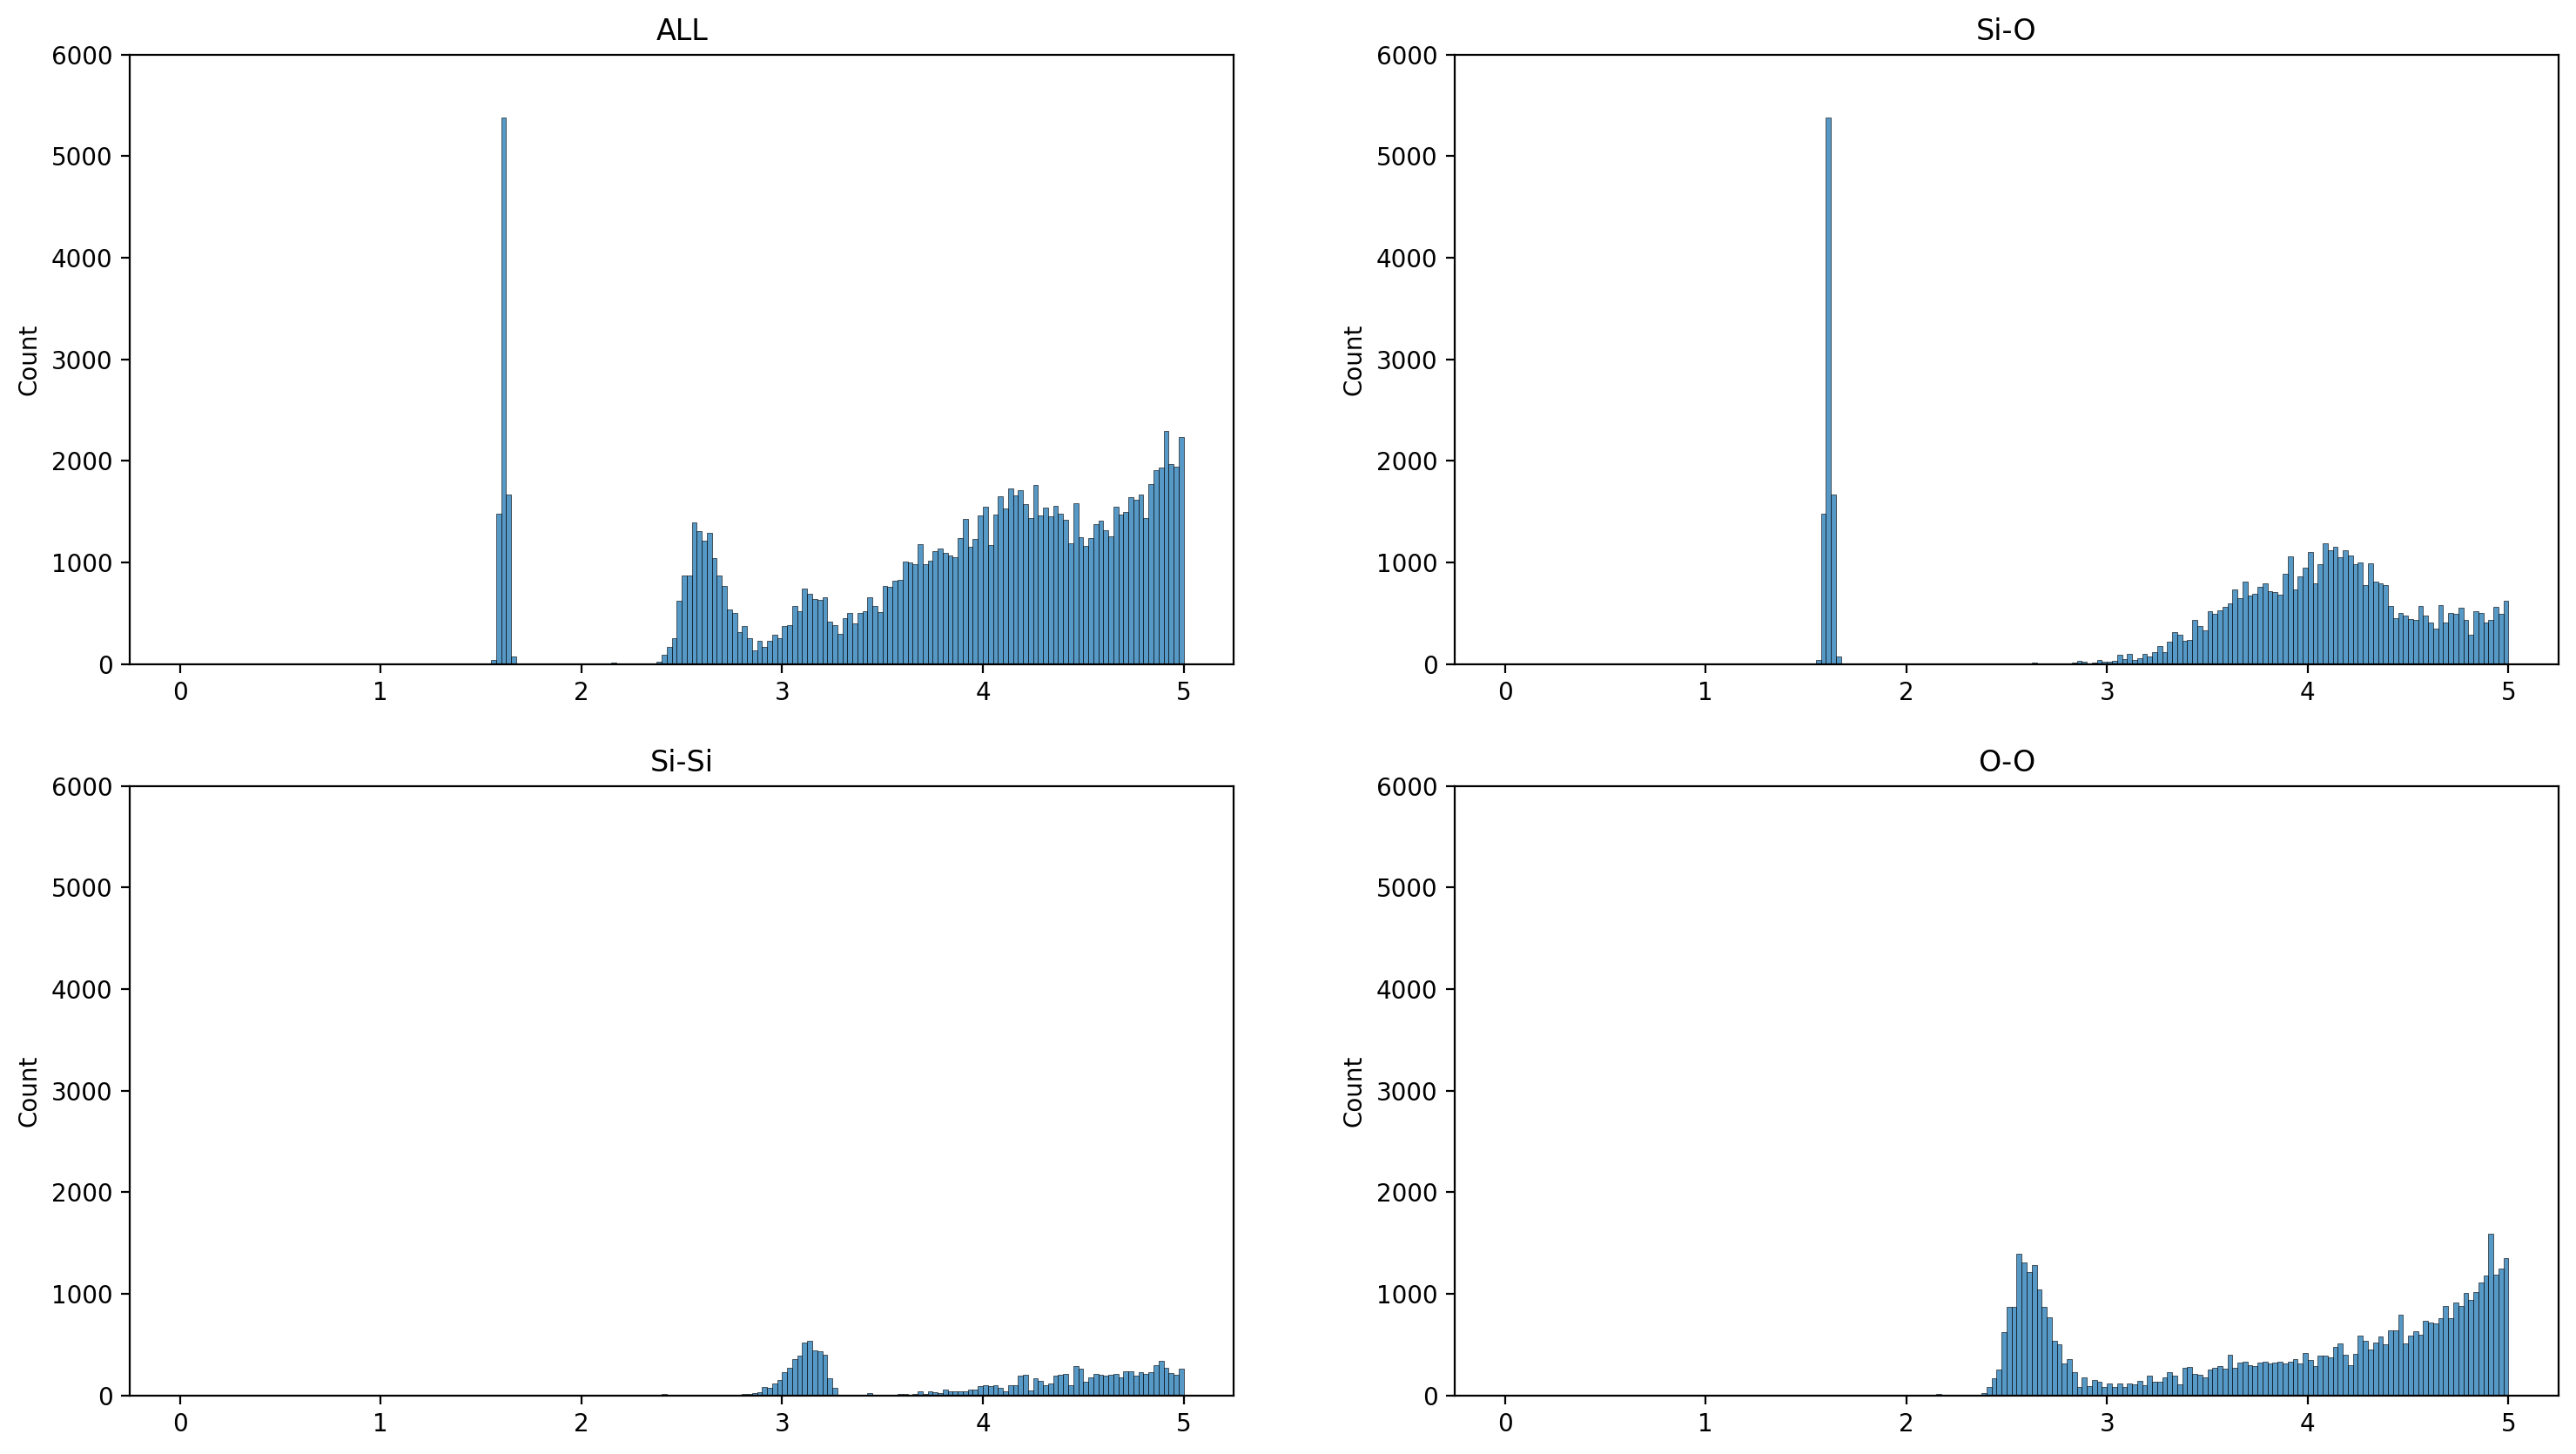

In [3]:
SiO_files = glob("amorphousSiO*.data")

all_dists = np.empty(0)
for files in SiO_files:
    atoms, xyz_coords, z_dim = read_lammps_out("amorphousSiO_1.data")
    cell_dims = [21.5, 21.5, z_dim[1]-z_dim[0]]
    
    for idx, coord in enumerate(xyz_coords):
        min_coords = _compiled_mic(coord, xyz_coords[idx:], cell_dims, len(atoms[idx:]))
        dists = np.linalg.norm(min_coords, axis=1)
        dists_within_tol = dists[(dists <= 7) & (dists != 0)]
        all_dists = np.append(all_dists, dists_within_tol)

all_dists_Si_O = np.empty(0)
for files in SiO_files:
    atoms, xyz_coords, z_dim = read_lammps_out("amorphousSiO_1.data")
    cell_dims = [21.5, 21.5, z_dim[1]-z_dim[0]]
    
    all_O_coords = xyz_coords[atoms == "O"]
    all_Si_coords = xyz_coords[atoms == "Si"]

    for Si in all_Si_coords:
        min_coords = _compiled_mic(Si, all_O_coords, cell_dims, len(all_O_coords))
        dists = np.linalg.norm(min_coords, axis=1)
        dists_within_tol = dists[(dists <= 7) & (dists != 0)]
        all_dists_Si_O = np.append(all_dists_Si_O, dists_within_tol)


all_dists_O_O = np.empty(0)
for files in SiO_files:
    atoms, xyz_coords, z_dim = read_lammps_out("amorphousSiO_1.data")
    cell_dims = [21.5, 21.5, z_dim[1]-z_dim[0]]
    
    all_O_coords = xyz_coords[atoms == "O"]

    for idx, O in enumerate(all_O_coords):
        min_coords = _compiled_mic(O, all_O_coords[idx:], cell_dims, len(all_O_coords[idx:]))
        dists = np.linalg.norm(min_coords, axis=1)
        dists_within_tol = dists[(dists <= 7) & (dists != 0)]
        all_dists_O_O = np.append(all_dists_O_O, dists_within_tol)

all_dists_Si_Si = np.empty(0)
for files in SiO_files:
    atoms, xyz_coords, z_dim = read_lammps_out("amorphousSiO_1.data")
    cell_dims = [21.5, 21.5, z_dim[1]-z_dim[0]]
    
    all_Si_coords = xyz_coords[atoms == "Si"]

    for idx, Si in enumerate(all_Si_coords):
        min_coords = _compiled_mic(Si, all_Si_coords[idx:], cell_dims, len(all_Si_coords[idx:]))
        dists = np.linalg.norm(min_coords, axis=1)
        dists_within_tol = dists[(dists <= 7) & (dists != 0)]
        all_dists_Si_Si = np.append(all_dists_Si_Si, dists_within_tol)


fig, axs = plt.subplots(2,2, figsize=(18,10), dpi=200)

sns.histplot(x=all_dists, binrange=[0,5], binwidth=0.025, ax=axs[0,0])
sns.histplot(x=all_dists_Si_O, binrange=[0,5], binwidth=0.025, ax=axs[0,1])
sns.histplot(x=all_dists_Si_Si, binrange=[0,5], binwidth=0.025, ax=axs[1,0])
sns.histplot(x=all_dists_O_O, binrange=[0,5], binwidth=0.025, ax=axs[1,1])

axs[0,0].set_title("ALL")
axs[0,1].set_title("Si-O")
axs[1,0].set_title("Si-Si")
axs[1,1].set_title("O-O")

axs[0,0].set_ylim([0,6000])
axs[0,1].set_ylim([0,6000])
axs[1,0].set_ylim([0,6000])
axs[1,1].set_ylim([0,6000])
plt.show()

(np.float64(1.613346742833259), np.float64(0.014426287232598306))


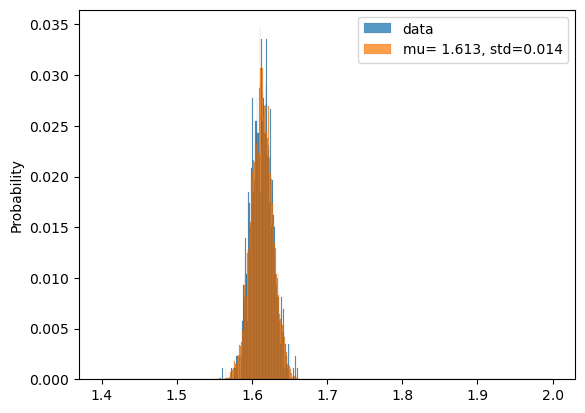

In [129]:
lower_lim = 1.4
upper_lim = 2.0
filtered_Si_O = all_dists_Si_O[(all_dists_Si_O >= lower_lim) & (all_dists_Si_O <= upper_lim)]
loc, scale = sp_s.norm.fit(filtered_Si_O)
print(sp_s.norm.fit(filtered_Si_O))
sns.histplot(x=filtered_Si_O, binrange=[lower_lim,upper_lim], binwidth=0.001, stat="probability", label="data")
mu = np.mean(filtered_Si_O)
std = np.std(filtered_Si_O)

x = sp_s.norm.rvs(loc=loc, scale=scale, size=len(filtered_Si_O))
# x = np.random.normal(loc=mu, scale=std, size=len(filtered_Si_O))
sns.histplot(x=x, binrange=[lower_lim,upper_lim], binwidth=0.001, stat="probability", label="mu= {:.3f}, std={:.3f}".format(mu, std))
plt.legend()
plt.show()

(np.float64(12.819877080503376), np.float64(1.276590516692125), np.float64(17.335310871612254))


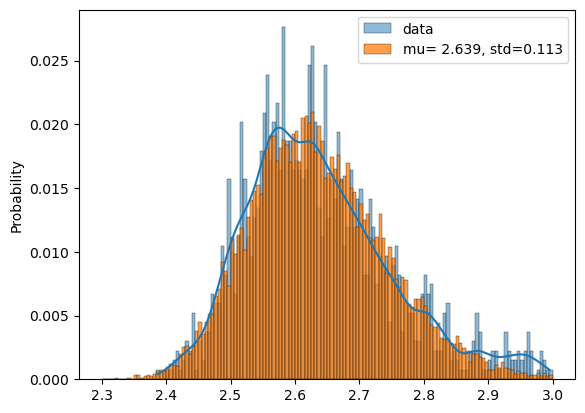

In [130]:
lower_lim = 2.3
upper_lim = 3.0
all_dists_O_O_filered = all_dists_O_O[(all_dists_O_O >= lower_lim) & (all_dists_O_O <= upper_lim)]
alpha, loc, scale = sp_s.alpha.fit(all_dists_O_O_filered)
print(sp_s.alpha.fit(all_dists_O_O_filered))

sns.histplot(x=all_dists_O_O_filered, binrange=[lower_lim,upper_lim], binwidth=0.005, stat="probability", label="data", kde=True)
mu = np.mean(all_dists_O_O_filered)
std = np.std(all_dists_O_O_filered)

x = sp_s.alpha.rvs(a=alpha, loc=loc, scale=scale, size=len(all_dists_O_O_filered))
# np.random.normal(loc=mu, scale=std, size=len(all_dists_O_O_filered))
sns.histplot(x=x, binrange=[lower_lim, upper_lim], binwidth=0.005, stat="probability", label="mu= {:.3f}, std={:.3f}".format(mu, std))
plt.legend()
plt.show()

(np.float64(20.50918422948114), np.float64(3.282331385061921), np.float64(1.8153399428512698), np.float64(1.3978541397862818))


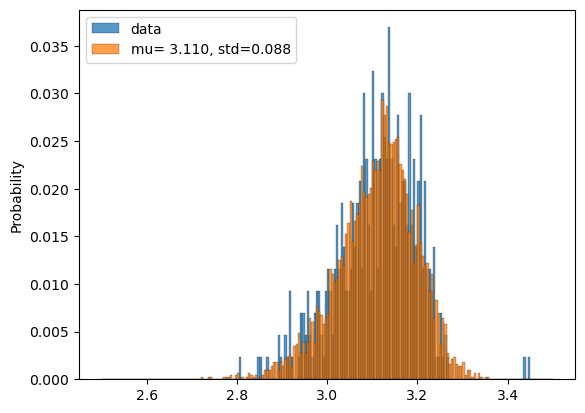

In [125]:
lower_lim = 2.5
upper_lim = 3.5
all_dists_Si_Si_filered = all_dists_Si_Si[(all_dists_Si_Si >= lower_lim) & (all_dists_Si_Si <= upper_lim)]
print(sp_s.burr12.fit(all_dists_Si_Si_filered))
c, d, loc, scale = sp_s.burr12.fit(all_dists_Si_Si_filered)

sns.histplot(x=all_dists_Si_Si_filered, binrange=[lower_lim,upper_lim], binwidth=0.005, stat="probability", label="data")
mu = np.mean(all_dists_Si_Si_filered)
std = np.std(all_dists_Si_Si_filered)

x = sp_s.burr12.rvs(c=c, d=d, loc=loc, scale=scale, size=len(all_dists_Si_Si_filered))
# x = np.random.normal(loc=mu, scale=std, size=len(all_dists_O_O_filered))
sns.histplot(x=x, binrange=[lower_lim, upper_lim], binwidth=0.005, stat="probability", label="mu= {:.3f}, std={:.3f}".format(mu, std))
plt.legend()
plt.show()

(np.float64(68.50536301711077), np.float64(0.4299182937422296), np.float64(-0.2260984913136991), np.float64(2.788587313802839))
-0.2260984913136991


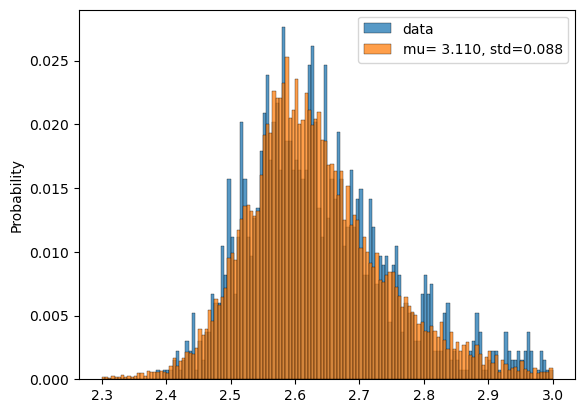

In [132]:
lower_lim = 2.3
upper_lim = 3.0
all_dists_O_O_filered = all_dists_O_O[(all_dists_O_O >= lower_lim) & (all_dists_O_O <= upper_lim)]
print(sp_s.burr12.fit(all_dists_O_O_filered))
c, d, loc, scale = sp_s.burr12.fit(all_dists_O_O_filered)

sns.histplot(x=all_dists_O_O_filered, binrange=[lower_lim,upper_lim], binwidth=0.005, stat="probability", label="data")
mu = np.mean(all_dists_Si_Si_filered)
std = np.std(all_dists_Si_Si_filered)

print(loc)
x = sp_s.burr12.rvs(c=c, d=d, loc=loc, scale=scale, size=len(all_dists_O_O_filered))
# x = np.random.normal(loc=mu, scale=std, size=len(all_dists_O_O_filered))
sns.histplot(x=x, binrange=[lower_lim, upper_lim], binwidth=0.005, stat="probability", label="mu= {:.3f}, std={:.3f}".format(mu, std))
plt.legend()
plt.show()

In [134]:
class Random_val_dict(dict):
    def __init__(self, *args, **kwargs):
        super(Random_val_dict, self).__init__(*args, **kwargs)

    def __getitem__(self, key):
        random_distribution = super(Random_val_dict, self).__getitem__(key)
        if hasattr(random_distribution, "rvs"):
            return random_distribution.rvs()
        return random_distribution
    
c, d, loc, scale = sp_s.burr12.fit(all_dists_Si_Si_filered)
func = sp_s.burr12(c=c, d=d, loc=loc, scale=scale).interval(0.95)
print(func)
radial_dict = {
    "Si": Random_val_dict({"Si": sp_s.burr12(c=c, d=d, loc=loc, scale=scale)})
}

(np.float64(2.9182204094224216), np.float64(3.2639004221169623))


In [124]:
radial_dict["Si"]["Si"]

np.float64(3.178846353756387)